# keras 一般流程

本节将简要介绍keras的功能特点，使用keras的一般流程，以及使用keras进行基本范例，分别处理分类和回归问题。

### 一，Keras简介

Keras 是一个用 Python 编写的高级神经网络 API，它能够以 TensorFlow, CNTK, 或者 Theano 作为后端运行。

Keras 具有以下优势：

简单易用：Keras是为人类而不是为机器设计的 API。它把用户体验放在首要和中心位置。Keras遵循减少认知困难的最佳实践，它提供一致且简单的 API，将常见用例所需的用户操作数量降至最低，并且在用户错误时提供清晰和可操作的反馈。

功能强大：Keras同时支持卷积神经网络和循环神经网络，以及两者的组合，它可以在CPU和GPU上无缝运行。Keras不仅提供了构建和训练神经网络模型的高级功能，还提供了模型结果可视化的工具，以及常见的图像和文本数据的预处理工具，另外Keras中还包括一些常用的玩具数据集和一些著名的已经训练好的神经网络模型。

高度灵活：用户可以使用Keras的函数式API构建任意结构的神经网络，如多输入多输出结构，残差网络，Inception网络等。通过自定义层和自定义模型，用户可以实现高度定制化的功能。利用Keras的后端backend提供的一些函数用户甚至可以从底层开始实现任意模型。

总之，这几乎是一个无懈可击的封装，集极致的体验，强大的功能，无限的灵活性于一身。

这就是Keras,你恰好发现了她！

目前Keras是github排名第二的开源深度学习框架，也是Kaggle竞赛中使用人数最多的神经网络框架。

### 二，使用流程

使用Keras进行神经网络实验的一般流程包括：

1，准备数据：

可以从keras的dataset导入玩具数据集，也可以导入外部数据集，并使用图像，文本，序列等数据预处理工具进行数据预处理。当数据规模较大时，需要使用Sequence等工具构建数据管道以备在训练过程中并行读取。

2，构建模型

可以使用以下3种方式构建模型：使用Sequential按层顺序构建模型，使用函数式API构建任意结构模型，继承Model基类构建自定义模型。

模型由层layer组成，keras中有许多已经定义好的层，用户可以使用backend函数定义Lambda匿名层，
此外用户也可以继承Layer层基类构建自定义层。

另外，用户也可以将application中已经训练好的模型加载进来，对其进行微调或者将其部分结构作为模型的一部分，模型本身也可以被看成一个层。

构建完模型后，需要用compile方法来编译模型，指定优化器，目标函数，评估指标，以及回调函数。

可以用summary方法来查看模型的结构和参数数量。也可以用plot_model方法来可视化模型的结构图。
如果需要使用tensorboard来对模型结构图及训练过程进行可视化，可以调用tensorboard回调函数。

3，训练模型

一般情况下可以用模型的fit方法训练模型，当数据集较大时，应当使用内存友好的fit_generator方法训练模型，如果需要细粒度的自定义训练过程，可以用train_on_batch逐批次地训练模型。

如果需要使用GPU训练模型，需要安装CUDA和cuDNN以支持相应计算，并安装tensorflow-gpu版本，则可以无缝切换到GPU运行。

如果需要使用多个GPU训练模型，可以使用keras.utils.multi_gpu_model创建支持多个GPU同时训练的模型。

4，评估模型

在通常情况下，训练模型时候指定验证集就可以在训练过程中输出模型的在训练集和验证集的损失和评估指标。然后可以用matplotlib将结果可视化，也可以利用回调函数在tensorboard中进行可视化。如果需要自定义评估指标，可以利用backend接口进行编写。

在模型训练完成后，可以用evaluate方法对模型进行评估，当数据集较大时，使用对内存友好的evaluate_generator方法评估模型，如果需要细粒度的评估，可以用test_on_batch在一个批次上评估模型。

5，使用模型

一般情况下使用模型的predict方法进行预测，当数据集较大时，使用predict_generator方法进行预测。

6，保存模型

keras可以用模型的save方法保存模型的结构和权重到.h5文件，也可以用save_weight方法只保存模型的权重到.h5文件，也可以用to_json或者to_yaml方法只保存模型的结构到json或者yaml文件。

### 三，分类范例

In [20]:
import keras
import tensorflow as tf
from keras import backend as K

**1，准备数据**

In [60]:
from keras import datasets
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

In [64]:
x_train.shape,y_train.shape 

((60000, 784), (60000, 10))

In [61]:
x_train = x_train.reshape((-1, 28 * 28))
x_train = x_train.astype('float32') / 255

x_test = x_test.reshape((-1,28*28))
x_test = x_test.astype('float32') / 255

In [63]:
from keras import utils

y_train = utils.to_categorical(y_train,num_classes= 10)
y_test = utils.to_categorical(y_test,num_classes= 10)

In [65]:
y_train[10]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

**2，构建模型**

In [77]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(512,activation = 'relu',input_shape=(28 * 28,)))
model.add(layers.Dense(10,activation = 'softmax' ))

model.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_22 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras import utils
utils.plot_model(model)

**3，训练模型**

In [78]:
history = model.fit(x_train,y_train,
                    epochs = 10,
                    batch_size = 128,
                    validation_data =(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 166us/step - loss: 0.2716 - acc: 0.9234 - val_loss: 0.1396 - val_acc: 0.9608
Epoch 2/10
60000/60000 [==============================] - 9s 158us/step - loss: 0.1116 - acc: 0.9681 - val_loss: 0.0952 - val_acc: 0.9715
Epoch 3/10
60000/60000 [==============================] - 9s 154us/step - loss: 0.0731 - acc: 0.9788 - val_loss: 0.0822 - val_acc: 0.9751
Epoch 4/10
60000/60000 [==============================] - 9s 158us/step - loss: 0.0523 - acc: 0.9844 - val_loss: 0.0684 - val_acc: 0.9794
Epoch 5/10
60000/60000 [==============================] - 9s 151us/step - loss: 0.0380 - acc: 0.9890 - val_loss: 0.0731 - val_acc: 0.9769
Epoch 6/10
60000/60000 [==============================] - 9s 150us/step - loss: 0.0292 - acc: 0.9915 - val_loss: 0.0657 - val_acc: 0.9786
Epoch 7/10
60000/60000 [==============================] - 9s 150us/step - loss: 0.0216 - acc: 0.9940 - val_loss: 0.0698 -

**4，评估模型**

In [72]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [94]:
import pandas as pd 
dfhistory = pd.DataFrame(history.history)
dfhistory.index = range(1,len(dfhistory) + 1)
dfhistory.index.name = 'epoch'

In [95]:
dfhistory

,val_loss,val_acc,loss,acc
epoch,,,,
1,0.139610,0.9608,0.271589,0.923367
2,0.095235,0.9715,0.111555,0.968067
3,0.082186,0.9751,0.073057,0.978817
4,0.068408,0.9794,0.052308,0.984400
5,0.073081,0.9769,0.038044,0.989033
6,0.065750,0.9786,0.029162,0.991517
7,0.069782,0.9775,0.021614,0.993967
8,0.067670,0.9799,0.015473,0.996100
9,0.071948,0.9794,0.011821,0.997117


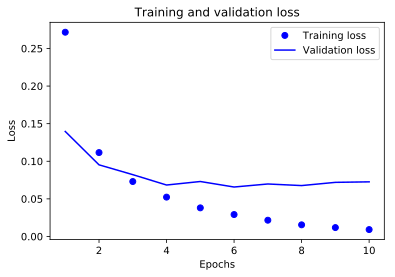

In [80]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

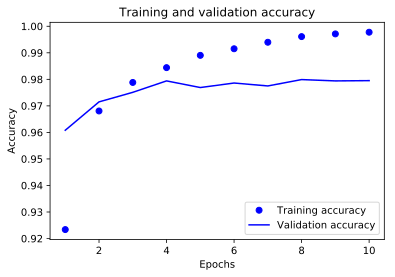

In [97]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [101]:
model.evaluate(x_train,y_train)

60000/60000 [==============================] - 5s 79us/step


[0.010392470628632388, 0.9972833333333333]

In [102]:
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 1s 81us/step


[0.07262816652887996, 0.9795]

**5，使用模型**

In [111]:
# 输出概率值
model.predict(x_test[0:3])

array([[7.4608684e-09, 2.1685040e-10, 1.3711951e-06, 5.2331674e-05,
        1.0432352e-11, 5.0908699e-09, 1.2189747e-11, 9.9993753e-01,
        4.5502765e-07, 8.2079778e-06],
       [6.6601054e-09, 1.1374224e-06, 9.9999881e-01, 9.8216750e-09,
        3.9951851e-20, 1.0544351e-09, 1.3030634e-11, 1.9622233e-16,
        1.2097957e-11, 4.0821565e-17],
       [1.4338494e-07, 9.9990118e-01, 2.3583931e-05, 5.0021182e-08,
        5.5373212e-06, 4.0145207e-07, 7.0558701e-07, 8.8256484e-06,
        5.9707843e-05, 9.0556744e-09]], dtype=float32)

In [112]:
# 直接输出类别
model.predict_classes(x_test[0:3])

array([7, 2, 1], dtype=int64)

** 6，保存模型 **

In [118]:
# 保存模型结构及权重

model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'
del model  # deletes the existing model

# returns a compiled model
# identical to the previous one
model = models.load_model('my_model.h5')
model.evaluate(x_test,y_test)


10000/10000 [==============================] - 1s 95us/step


[0.07262816652887996, 0.9795]

In [124]:
# 保存模型结构

json_str = model.to_json()
yaml_str = model.to_yaml()

# 恢复模型结构
model_json = models.model_from_json(json_str)
model_yaml = models.model_from_yaml(yaml_str)

In [123]:
print(yaml_str)

backend: tensorflow
class_name: Sequential
config:
  layers:
  - class_name: Dense
    config:
      activation: relu
      activity_regularizer: null
      batch_input_shape: !!python/tuple [null, 784]
      bias_constraint: null
      bias_initializer:
        class_name: Zeros
        config: {}
      bias_regularizer: null
      dtype: float32
      kernel_constraint: null
      kernel_initializer:
        class_name: VarianceScaling
        config: {distribution: uniform, mode: fan_avg, scale: 1.0, seed: null}
      kernel_regularizer: null
      name: dense_21
      trainable: true
      units: 512
      use_bias: true
  - class_name: Dense
    config:
      activation: softmax
      activity_regularizer: null
      bias_constraint: null
      bias_initializer:
        class_name: Zeros
        config: {}
      bias_regularizer: null
      kernel_constraint: null
      kernel_initializer:
        class_name: VarianceScaling
        config: {distribution: uniform, mode: fan_avg, s

In [130]:
#保存模型权重
model.save_weights('model_weights.h5')

# 恢复模型结构
model_json = models.model_from_json(json_str)
model_json.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])
# 加载权重
model_json.load_weights('model_weights.h5')

In [129]:
model_json.evaluate(x_test,y_test)

10000/10000 [==============================] - 1s 102us/step


[0.07262816652887996, 0.9795]

### 四，回归范例

**1，准备数据**

In [133]:
import keras 
import tensorflow as tf
from keras import datasets
from keras import models
from keras import layers
from keras import backend as K

In [144]:
(x_train,y_train),(x_test,y_test) = datasets.boston_housing.load_data()

In [145]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1,1))
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [148]:
x_train.shape

(404, 13)

**2，构建模型**

In [155]:
from keras import models
from keras import layers
model = models.Sequential()

model.add(layers.Dense(10,activation = 'relu',input_shape = [13]))
model.add(layers.Dense(1,activation=None))

model.summary()
model.compile(optimizer= 'adam',
             loss = 'mse',
             metrics = ['mae'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 10)                140       
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 11        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


**3，训练模型**

In [156]:
history = model.fit(x_train,y_train,
                    epochs = 80,
                    batch_size = 8,
                    validation_data =(x_test,y_test))

Train on 404 samples, validate on 102 samples
Epoch 1/80
404/404 [==============================] - 1s 2ms/step - loss: 583.1341 - mean_absolute_error: 22.2604 - val_loss: 597.7068 - val_mean_absolute_error: 22.6142
Epoch 2/80
404/404 [==============================] - 0s 248us/step - loss: 552.5531 - mean_absolute_error: 21.5698 - val_loss: 567.4455 - val_mean_absolute_error: 21.9305
Epoch 3/80
404/404 [==============================] - 0s 198us/step - loss: 519.5352 - mean_absolute_error: 20.8020 - val_loss: 530.9462 - val_mean_absolute_error: 21.0859
Epoch 4/80
404/404 [==============================] - 0s 252us/step - loss: 478.0362 - mean_absolute_error: 19.7890 - val_loss: 483.1507 - val_mean_absolute_error: 19.9385
Epoch 5/80
404/404 [==============================] - 0s 248us/step - loss: 426.5550 - mean_absolute_error: 18.4799 - val_loss: 426.5100 - val_mean_absolute_error: 18.4977
Epoch 6/80
404/404 [==============================] - 0s 223us/step - loss: 368.4425 - mean_abso

404/404 [==============================] - 0s 347us/step - loss: 32.6848 - mean_absolute_error: 3.8673 - val_loss: 27.7570 - val_mean_absolute_error: 3.7240
Epoch 50/80
404/404 [==============================] - 0s 248us/step - loss: 31.9454 - mean_absolute_error: 3.8449 - val_loss: 27.1058 - val_mean_absolute_error: 3.6855
Epoch 51/80
404/404 [==============================] - 0s 223us/step - loss: 31.2772 - mean_absolute_error: 3.7834 - val_loss: 26.5100 - val_mean_absolute_error: 3.6362
Epoch 52/80
404/404 [==============================] - 0s 198us/step - loss: 30.5534 - mean_absolute_error: 3.7386 - val_loss: 26.0155 - val_mean_absolute_error: 3.5984
Epoch 53/80
404/404 [==============================] - 0s 198us/step - loss: 29.9347 - mean_absolute_error: 3.7169 - val_loss: 25.6538 - val_mean_absolute_error: 3.5671
Epoch 54/80
404/404 [==============================] - 0s 248us/step - loss: 29.2944 - mean_absolute_error: 3.6685 - val_loss: 25.0152 - val_mean_absolute_error: 3.526

**4，评估模型**

In [157]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [158]:
import pandas as pd 
dfhistory = pd.DataFrame(history.history)
dfhistory.index = range(1,len(dfhistory) + 1)
dfhistory.index.name = 'epoch'

In [159]:
dfhistory

,val_loss,val_mean_absolute_error,loss,mean_absolute_error
epoch,,,,
1,597.706780,22.614233,583.134124,22.260394
2,567.445539,21.930458,552.553072,21.569773
3,530.946150,21.085916,519.535175,20.801955
4,483.150738,19.938513,478.036212,19.788976
5,426.510021,18.497728,426.554989,18.479886
6,365.816166,16.824329,368.442459,16.872873
7,304.182787,15.009357,309.493327,15.058637
8,248.853343,13.227894,253.489514,13.142353
9,201.721141,11.534320,203.823317,11.294736


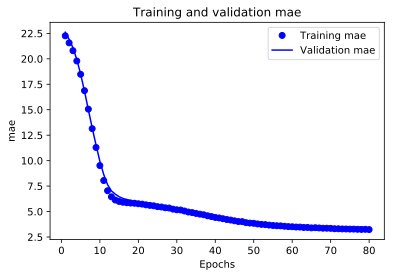

In [160]:
import matplotlib.pyplot as plt

mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']
epochs = range(1, len(mae) + 1)
plt.plot(epochs, mae, 'bo', label='Training mae')
plt.plot(epochs, val_mae, 'b', label='Validation mae')
plt.title('Training and validation mae')
plt.xlabel('Epochs')
plt.ylabel('mae')
plt.legend()
plt.show()

In [176]:
model.evaluate(x_test,y_test )

102/102 [==============================] - 0s 98us/step


[21.483259313246784, 3.2963774344500374]

**5，使用模型**

In [184]:
y_test_hat = model.predict(x_test).reshape(-1)

In [186]:
mae_test = keras.metrics.mae(y_test,y_test_hat)

In [187]:
K.eval(mae_test)

3.2963774849386778

**6，保存模型**

In [189]:
model.save('boston_housing_model.h5')